### Student Information
Name: Gueter Josmy Faure (費蓋德）

Student ID: 109062421

GitHub ID: joslefaure

Kaggle name: Josmy Faure (Team name: Damn it)

Kaggle private scoreboard snapshot:

[Snapshot](leaderBoard.png)

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2020-Lab2-Master Repo](https://github.com/fhcalderon87/DM2020-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2020-hw2-nthu/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Dec. 5th 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM2020-Lab2-Homework](https://github.com/fhcalderon87/DM2020-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 8th 11:59 pm, Tuesday)__. 

# Part 1 - Take home exercises

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [5]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


[nltk_data] Downloading package stopwords to /home/josmy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


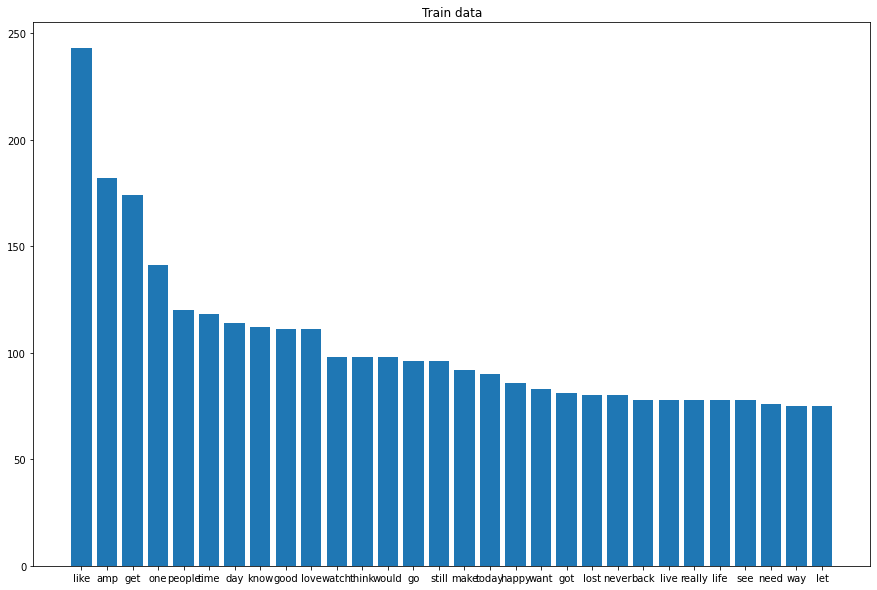

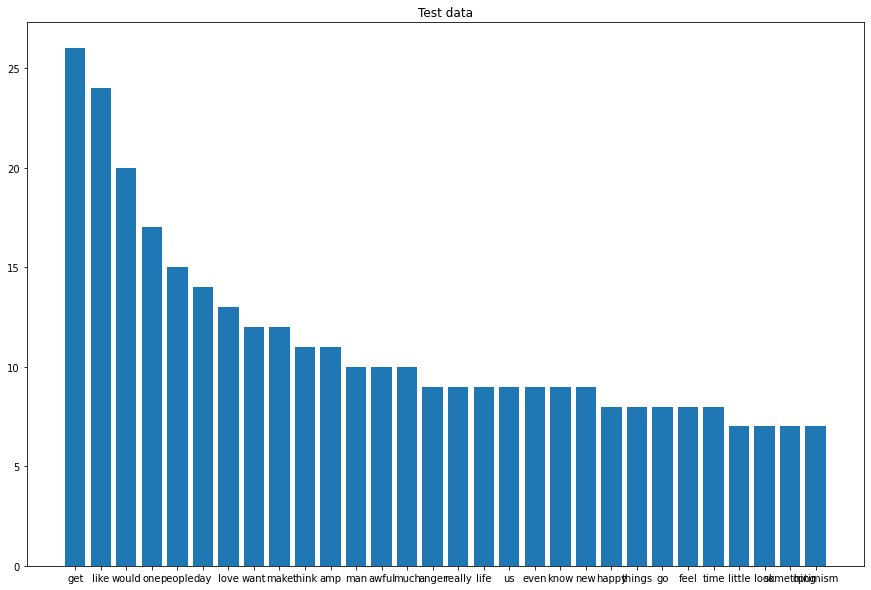

In [6]:
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
import numpy as np
import matplotlib.pyplot as plt

# Convert everything to just one string (one for train, one for test)
# Also lowecase them to avoid unintended duplicates
train_text = list(train_df.text.values)
test_text = list(test_df.text.values)
train_text = " ".join(train_text).lower()
test_text = " ".join(test_text).lower()
train_text_clean = re.sub('\W+', ' ', train_text)
test_text_clean = re.sub('\W+', ' ', test_text)


stop_words = set(stopwords.words('english')) 
  
train_text_clean = [i for i in train_text_clean.split() if len(i) > 1]
test_text_clean = [i for i in test_text_clean.split() if len(i) > 1]

filtered_train = [w for w in train_text_clean if not w in stop_words]
filtered_test = [w for w in test_text_clean if not w in stop_words]

counter_train = Counter(filtered_train)
counter_test = Counter(filtered_test)

labels, values = zip(*counter_train.items())

indSort = np.argsort(values)[::-1][:30] 

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))
f = plt.figure(figsize=(15,10))

plt.bar(indexes, values)
# 
# add labels
plt.title("Train data")
plt.xticks(indexes, labels)
f.show()

labels, values = zip(*counter_test.items())

indSort = np.argsort(values)[::-1][:30] 

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))
g = plt.figure(figsize=(15,10))

plt.bar(indexes, values)
# 
# add labels
plt.xticks(indexes, labels)
plt.title("Test data")
g.show()

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [7]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [8]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [9]:
#group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

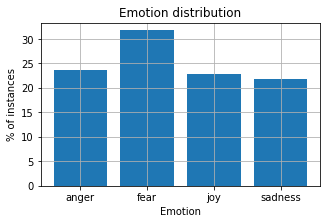

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [13]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [14]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [15]:
type(train_data_BOW_features)

scipy.sparse.csr.csr_matrix

In [16]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [18]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names()
feature_names[100:110]

['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s', '31']

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [19]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [20]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

/home/josmy/.conda/envs/dm/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(3613, 500)

In [21]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0]])

In [22]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names()
feature_names_500[100:110]

['change',
 'cheer',
 'cheerful',
 'cheering',
 'cheery',
 'class',
 'come',
 'comes',
 'could',
 'country']

In [23]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Learn a vocabulary dictionary of all tokens in the raw documents
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_tfidf_features = tfidf_vectorizer.transform(train_df['text'])
test_data_tfidf_features = tfidf_vectorizer.transform(test_df['text'])

# observe some feature names
feature_names_tfidf = tfidf_vectorizer.get_feature_names()
feature_names_tfidf[100:110]

['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s', '31']

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [25]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [26]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['sadness', 'joy', 'anger', 'joy', 'sadness', 'fear', 'sadness',
       'joy', 'anger', 'anger'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [27]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.66


In [28]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.67      0.70      0.69        84
        fear       0.67      0.65      0.66       110
         joy       0.65      0.65      0.65        79
     sadness       0.66      0.65      0.65        74

    accuracy                           0.66       347
   macro avg       0.66      0.66      0.66       347
weighted avg       0.66      0.66      0.66       347



In [29]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[59 12 10  3]
 [15 72 10 13]
 [ 6 13 51  9]
 [ 8 10  8 48]]


In [30]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

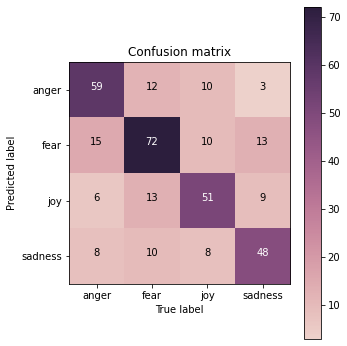

In [31]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

<p>The main diagonal of the matrix above represents the true positives, i.e., the number of times the prediction for each label is true. 

For example, let's consider the first column: The number of sentences depicting anger classified as anger is 59, the number of sentences depicting anger but classified as fear is 15, the number of those classified as joy is 6 and 8 of them are classified as sadness. We can use this column to calculate the accuracy for this specific class (anger) --> $ 59/ (59 + 15 + 6 + 8) = 0.67 $. This means a sentence depicting anger is classified as anger `67%` of the time. We can use the same logic for each column.
    
We can also look at it row-wise: For the first row, `59` is the number of sentences where `anger is classified as anger`, `12` the number of sentences which depict `fear but classified as anger` by our model, and so on...

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [32]:
from sklearn.naive_bayes import MultinomialNB

## build DecisionTree model
NB_model = MultinomialNB(alpha=0.1)

## training!
NB_model = NB_model.fit(X_train, y_train)

## predict!
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.8
testing accuracy: 0.71


Decision tree result was too good for training and not good enough for testing (compared to the training accuracy). We can say that overfitting happened at training. Naive Bayes gives a better result on the test data. Tweaking alpha - the smoothing parameter - we can get better results. 

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

**Answer**

Decision trees are very prone to overfitting whereas Naive Bayes, which is based on conditional probability, do not overfit easily.

Naive Bayes does not need much data, decision trees do. 

In the above case, the DT classifier clearly overfits the training data. This will usually happen unless we apply `pruning`. Also, there are not that much data, therefore, Naive Bayes proved to be better with this task.

---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
    * Trying different features (Feature engineering)
        -Eg. Word2Vec,PCA,LDA,FastText, Clustering......
    * Trying different models
    * Analyzing your results and interpret them to improve your feature engineering/model building process
    * Iterate through the steps above until finding a satisfying result
Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framwork, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![Fully Connected Network](pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [33]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

Using TensorFlow backend.


X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [34]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 697     anger
1539     fear
2768      joy
1205     fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [35]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![Imgur](pics/pic2.png)

In [36]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32064     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_2 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
____________________________________________

### 6.4 Train

In [37]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')


Train on 3613 samples, validate on 347 samples
Epoch 1/25
3613/3613 [==============================] - 1s 307us/step - loss: 1.3328 - accuracy: 0.3623 - val_loss: 1.2990 - val_accuracy: 0.4006
Epoch 2/25
3613/3613 [==============================] - 0s 104us/step - loss: 1.0147 - accuracy: 0.6263 - val_loss: 0.9530 - val_accuracy: 0.6427
Epoch 3/25
3613/3613 [==============================] - 0s 116us/step - loss: 0.6019 - accuracy: 0.7885 - val_loss: 0.7984 - val_accuracy: 0.6801
Epoch 4/25
3613/3613 [==============================] - 0s 117us/step - loss: 0.4199 - accuracy: 0.8464 - val_loss: 0.8108 - val_accuracy: 0.6772
Epoch 5/25
3613/3613 [==============================] - 0s 93us/step - loss: 0.3346 - accuracy: 0.8788 - val_loss: 0.8077 - val_accuracy: 0.6916
Epoch 6/25
3613/3613 [==============================] - 0s 93us/step - loss: 0.2677 - accuracy: 0.9042 - val_loss: 0.8864 - val_accuracy: 0.6599
Epoch 7/25
3613/3613 [==============================] - 0s 106us/step - loss: 

### 6.5 Predict on testing data

In [38]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

array([[1.2425181e-01, 8.3732888e-02, 4.2673931e-03, 7.8774792e-01],
       [3.4865996e-05, 1.9644805e-05, 9.9993467e-01, 1.0862693e-05],
       [5.8544320e-01, 2.2678336e-05, 4.1452891e-01, 5.1848906e-06],
       [7.4238883e-04, 5.2269879e-03, 9.9268883e-01, 1.3418274e-03],
       [9.1854680e-01, 2.0578038e-03, 5.2417934e-02, 2.6977476e-02]],
      dtype=float32)

In [39]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['sadness', 'joy', 'anger', 'joy', 'anger'], dtype=object)

In [40]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.65


In [41]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.362303,1.332841,0.400576,1.298963
1,1,0.626349,1.014682,0.642651,0.952988
2,2,0.788541,0.601931,0.680115,0.798399
3,3,0.846388,0.419885,0.677233,0.810846
4,4,0.878771,0.334574,0.691643,0.807716
5,5,0.904235,0.267705,0.659942,0.886391
6,6,0.926100,0.219106,0.680115,0.965968
7,7,0.946582,0.180714,0.680115,0.998069
8,8,0.950733,0.157679,0.671470,1.122521
9,9,0.958483,0.138644,0.680115,1.104481


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

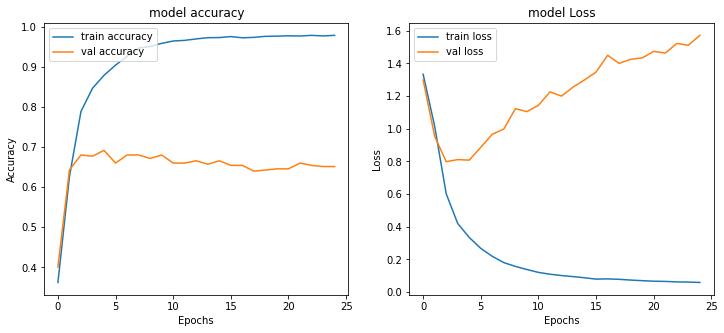

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].plot(training_log['accuracy'])
axes[0].plot(training_log['val_accuracy'])

axes[0].set_title('model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].legend(['train accuracy', 'val accuracy'], loc='upper left')

axes[1].plot(training_log['loss'])
axes[1].plot(training_log['val_loss'])
axes[1].set_title('model Loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epochs')
axes[1].legend(['train loss', 'val loss'], loc='upper left')

plt.show()

---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [43]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
697,10697,"Are you lost in the fury, fearing that you'll ...","[Are, you, lost, in, the, fury, ,, fearing, th..."
1539,20682,@MidgetTamer @RAIDERS @52Mack_ Make him be a b...,"[@, MidgetTamer, @, RAIDERS, @, 52Mack_, Make,..."
2768,30764,@BbeautifulSoul_ u always gotta attitude tho ....,"[@, BbeautifulSoul_, u, always, got, ta, attit..."
1205,20348,@BraveHermione_ + and gives it to hear] 'Pleas...,"[@, BraveHermione_, +, and, gives, it, to, hea..."
2702,30698,"Meanwhile, the so-called M’s fans sit there kn...","[Meanwhile, ,, the, so-called, M, ’, s, fans, ..."


In [44]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['Are', 'you', 'lost', 'in', 'the', 'fury', ',', 'fearing', 'that', 'you', "'ll", 'fail', '?']),
       list(['@', 'MidgetTamer', '@', 'RAIDERS', '@', '52Mack_', 'Make', 'him', 'be', 'a', 'bully', '.', 'Sit', 'him', 'in', 'a', 'room', 'by', 'himself', 'and', 'let', 'him', 'look', 'at', 'Debo', 'all', 'day', '.']),
       list(['@', 'BbeautifulSoul_', 'u', 'always', 'got', 'ta', 'attitude', 'tho', '...', '😕', 'cheer', 'up'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [45]:
## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
697,10697,"Are you lost in the fury, fearing that you'll ...","[Are, you, lost, in, the, fury, ,, fearing, th..."
1539,20682,@MidgetTamer @RAIDERS @52Mack_ Make him be a b...,"[@, MidgetTamer, @, RAIDERS, @, 52Mack_, Make,..."
2768,30764,@BbeautifulSoul_ u always gotta attitude tho ....,"[@, BbeautifulSoul_, u, always, got, ta, attit..."
1205,20348,@BraveHermione_ + and gives it to hear] 'Pleas...,"[@, BraveHermione_, +, and, gives, it, to, hea..."
2702,30698,"Meanwhile, the so-called M’s fans sit there kn...","[Meanwhile, ,, the, so-called, M, ’, s, fans, ..."


In [46]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          size=vector_dim, window=window_size, 
                          min_count=min_count, iter=training_iter)

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [47]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([-0.20693193,  0.24215731, -0.30583188, -0.00280985,  0.01937672,
        0.11973739,  0.3065998 , -0.56881076, -0.1059767 ,  0.85353607,
        0.6592977 , -0.74156135,  0.42019132, -0.20310444, -0.23071364,
       -0.04667698,  0.5897097 , -0.4716229 , -0.17875728,  0.6263324 ,
       -0.23992403, -0.4196211 , -0.17247905, -0.17641439,  0.5803866 ,
        0.76369524,  0.43986946,  0.79069173, -0.13421743,  0.16767164,
       -0.13242961,  0.72404   , -0.04339638, -1.0174116 ,  0.6672357 ,
        1.09049   , -1.181839  ,  0.03061492,  1.5992383 ,  0.07774176,
       -0.15523276,  0.8332134 , -0.40065396, -0.791188  ,  0.86411697,
        0.04513359,  0.6991168 ,  0.7293732 ,  0.29756612,  0.56547886,
       -0.79383457,  0.19998893,  0.16347317,  0.17000403, -0.03602151,
        0.69577265,  0.10319906,  0.45797515,  0.37404126,  0.1750662 ,
        1.266966  ,  0.47283477,  0.44137534, -0.07577088,  0.38661358,
        0.37339914, -0.02664829, -0.00182185, -0.86265093, -0.69

In [48]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.most_similar(word, topn=topn)

[('Makes', 0.9465088248252869),
 ('help', 0.9443371295928955),
 ('birthday', 0.9384873509407043),
 ('PUSSY\\nP', 0.9298322200775146),
 ('blessed', 0.9279271364212036),
 ('play', 0.9248052835464478),
 ('vigilant', 0.9243762493133545),
 ('trusted', 0.9235905408859253),
 ('suffer', 0.9214901924133301),
 ('See', 0.9210564494132996)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [49]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437948942184448),
 ('proud', 0.636042058467865),
 ('delighted', 0.6272379159927368),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [50]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577817916870117),
 ('thank', 0.9376667141914368),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183938980103),
 ('miss', 0.916450023651123),
 ('hello', 0.9158351421356201),
 ('thanks', 0.9150084853172302),
 ('merry', 0.9053248167037964),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164639472961)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [51]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431607246399),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


**Answer**

We can do this using a for loop get the embeddings of each word in the sentence and append. Each sentence will then have a dimension of `(number_of_words, 100)`. (see example below)

In [52]:
given_sentence = "life is hard"
sentence_embed = []
for word in given_sentence.split():
    word_vec = word2vec_model.wv[word]
    sentence_embed.append(word_vec)
    
np.array(sentence_embed).shape

(3, 100)

### 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [53]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [54]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![Imgur](pics/pic6.png)

In [55]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

In [56]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)


## 9. High-dimension Visualization: t-SNE

No matter if you use the Bag-of-words, tf-idf, or word2vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient...

Our aim will be to create a visualization similar to the one below:

![Image](pics/pic7.png)
source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

Here we would like to introduce another visualization method called t-SNE.  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 

### 9.1 Prepare visualizing target

Let's repare data lists like:
    - happpy words
    - angry words
    - data words
    - mining words

In [57]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.1 Plot using t-SNE (2-dimension)

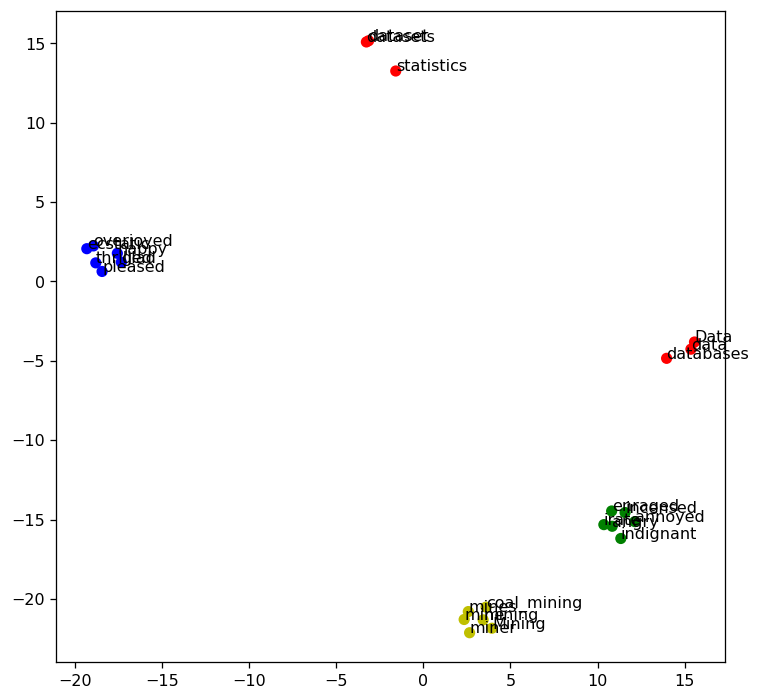

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [63]:
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
# print('\ntarget words: ')
# print(target_words)

# print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
# print(color)


angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']


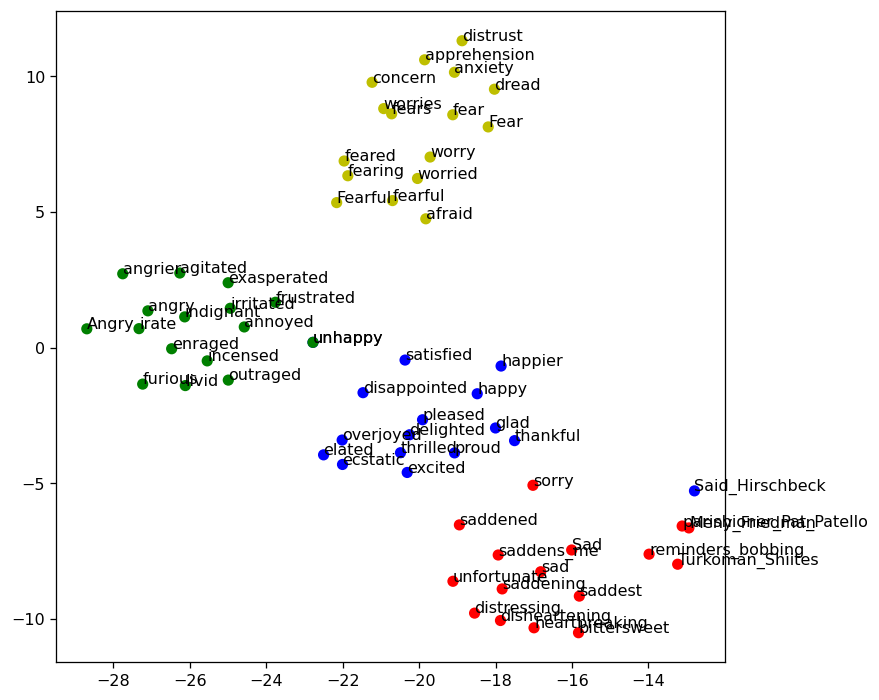

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
# Kaggle Competition Report

### Read, preprocess data and do feature engineering

In [4]:
import pandas as pd
# read our data
data_path = '../data/'
data_id = pd.read_csv(data_path + 'data_identification.csv')
emotions = pd.read_csv(data_path + 'emotion.csv')
sample_sub = pd.read_csv(data_path + 'sampleSubmission.csv')
tweets = pd.read_json(data_path + 'tweets_DM.json', lines=True)
tweets_important = pd.DataFrame(tweets._source)

In [31]:
# Create a final dataframe from all of the data sources
tw_list = tweets_important['_source'].to_list()
tmp_df = pd.DataFrame.from_records(tw_list)
tmp_df_list = tmp_df['tweet'].to_list()
final_tweet_df = pd.DataFrame.from_records(tmp_df_list)
df_final = pd.merge(final_tweet_df, data_id, how='outer', on='tweet_id').merge(emotions, how='outer', on='tweet_id')

df_final.head()

,hashtags,tweet_id,text,identification,emotion
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,anticipation
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,sadness
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test,NaN
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",test,NaN


Wow, the data is huge

In [32]:
# let's look at a typical tweet
df_final.text.values[1200]

'We are talking of Moving ahead & people like <LH> causes Internet ban in many states,#Shame.  We must stop giving them respect'

It definitely needs preprocessing

In [33]:
# Remove the stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

df_final['text'] = df_final['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /home/josmy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
# Preprocess the tweet (removes hashtag and references (@))
import preprocessor as p # needs tweet-preprocessor package
def preprocess_tweet(row):
    text = row['text']
    text = p.clean(text)
    return text

df_final['text'] = df_final.apply(preprocess_tweet, axis=1)

In [36]:
# Further preprocessing for capital letter and special charachters
df_final['text'] = df_final['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ').str.replace('lh', '').str.strip()

In [37]:
df_final.text.values[1200]

'we talking moving ahead people like  causes internet ban many states we must stop giving respect'

**Much better now**

In [40]:
# Separate training from testing data
train_df = df_final[df_final['identification'] == 'train']
test_df = df_final[df_final['identification'] == 'test']

In [41]:
# How big are the training and testing data
print(train_df.shape[0])
print(test_df.shape[0])

1455563
411972


<AxesSubplot:>

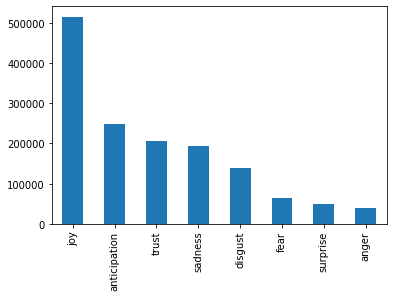

In [42]:
# Let's have a look at the distribution of the training data with respect to our targets
# We observe a long-tailed distribution
train_df.emotion.value_counts().plot(kind='bar')

### LSTM method

In [ ]:
# One hot encode the labels
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(train_df.sentiment_id)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
Y = onehot_encoder.fit_transform(integer_encoded)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_df.clean_content,Y, random_state=1995, test_size=0.2, shuffle=True)

In [ ]:
# using keras tokenizer here to tokenize the sentences
from keras.preprocessing import text, sequence

token = text.Tokenizer(num_words=None)
max_len = 160
Epoch = 5
token.fit_on_texts(list(X_train) + list(X_test))
X_train_pad = sequence.pad_sequences(token.texts_to_sequences(X_train), maxlen=max_len)
X_test_pad = sequence.pad_sequences(token.texts_to_sequences(X_test), maxlen=max_len)

In [ ]:
w_idx = token.word_index

In [ ]:
# LSTM model
from keras import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM
embed_dim = 160
lstm_out = 250

model = Sequential()
model.add(Embedding(len(w_idx) +1 , embed_dim,input_length = X_test_pad.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(keras.layers.core.Dense(8, activation='softmax'))
#adam rmsprop 
model.compile(loss = "categorical_crossentropy", optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Using this model, I only got 20~22% on the public leaderboard. It is very bad because the data is unbalanced and complex. Also, I could only train for two epochs (it takes so long).

I also paired Word2Vec with the LSTM model but it did not improve the accuracy by much, therefore I decided not to include it here. I noted that overfitting starts after the first three epochs but could not figure out why. 

One thing that boosted LSTM's accuracy was the bidirectional. Later in my experiments, I used a bidirectional LSTM instead of the forward one showed in the previous cell, it gave a result of around 0.43 on the public leaderboard, a huge improvement which makes sense since, in a tweet, the latter words may help understand the sense of the previous ones and the meaning of the sentence overall.

### Using Bert Method (simple, distilled)

In [ ]:
y_map = {
    'joy': 0, 
    'anticipation': 1, 
    'trust': 2, 
    'sadness': 3, 
    'disgust': 4,
    'fear': 5, 
    'surprise': 6, 
    'anger': 7

}

train_df['Sentiment_Cat'] = train_df['emotion'].map(y_map)
test_df['Sentiment_Cat'] = test_df['emotion'].map(y_map)

In [ ]:
x_train, y_train = train_df['tweet_cleaned'].values, np.array(train_df['Sentiment_Cat'], dtype=np.int64)
x_test, y_test = test_df['tweet_cleaned'].values, np.array(test_df['Sentiment_Cat'], dtype=np.int64)

In [ ]:
from tokenizers import BertWordPieceTokenizer
import transformers

In [ ]:
# First load the real tokenizer
tokenizer = transformers.BertTokenizerFast.from_pretrained('bert-base-uncased', lower=True)

# Save the loaded tokenizer locally
tokenizer.save_pretrained('.')

# Reload it with the huggingface tokenizers library
fast_tokenizer = BertWordPieceTokenizer('vocab.txt', lowercase=True)
fast_tokenizer

In [ ]:
# Funtion to encode the dataset
def fast_encode(texts, tokenizer, chunk_size=256, maxlen=200):
    tokenizer.enable_truncation(max_length=maxlen)
    tokenizer.enable_padding(length=maxlen)
    all_ids = []
    
    for i in range(0, len(texts), chunk_size):
        text_chunk = texts[i:i+chunk_size].tolist()
        encs = tokenizer.encode_batch(text_chunk)
        all_ids.extend([enc.ids for enc in encs])
    
    return np.array(all_ids)

In [ ]:
max_len=100

x_train_enc = fast_encode(x_train, fast_tokenizer, maxlen=max_len)
x_test_enc = fast_encode(x_test, fast_tokenizer, maxlen=max_len)

In [ ]:
NUM_CLASSES = train_df['Sentiment_Cat'].nunique()

# bert_transformer = transformers.TFDistilBertModel.from_pretrained('distilbert-base-uncased')
bert_transformer = transformers.TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=NUM_CLASSES)

input = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32)
sequence_output = bert_transformer(input)[0]

model = tf.keras.Model(inputs=input, outputs=sequence_output)
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
# call backs
early_stop_callback = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy', 
    patience=3, 
    restore_best_weights=True
)

# Fit model
history = model.fit(
    x_train_enc,
    y_train,
    batch_size=16,
    #validation_data=(x_test_enc, y_test),
    epochs=2,
    callbacks=[early_stop_callback])

In [ ]:
# Prepare submission file
ypred = model.predict(x_test_enc)
df_test['ypred_cat'] = np.argmax(ypred, axis=1)
y_map_inv = {v: k for k, v in y_map.items()}
my_df = pd.DataFrame({'id': df_test.tweet_id})
my_df['emotion'] = df_test['ypred_cat'].map(y_map_inv)
my_df.to_csv("prediction.csv", index=False)

This model was more powerful and would probably do well if I could train for more epochs (it was really promising). But due to computational power, I could not train more nor use the optimal hyperparameters. Note that I also only used a third of the dataset for training because when I use all of it, my RAM craches. Maybe because of the tensorflow backend, I did not have much control over the tokenization and the network's resource allocation. That's why in the next step, I use pytorch (although it requires more work) in order to be able to train the whole dataset.

At this stage, **The result on the leaderboard was around 40~43%**

### Bert With the whole dataset pytorch version (A little bit faster than the tensorflow one)

In [ ]:
import torch
from transformers import BertTokenizer
from IPython.display import clear_output

PRETRAINED_MODEL_NAME = "bert-large-cased"

# Bert tokenizer
tokenizer = BertTokenizer.from_pretrained(PRETRAINED_MODEL_NAME)

In [ ]:
# 80:20 for train, val split
train_pct_index = int(0.8 * len(train_df))
train_df, validation_df = train_df[:train_pct_index], train_df[train_pct_index:]

# Need to reset index for pytorch dataframe to understand
train_df = train_df.reset_index(drop=True)
validation_df = validation_df.reset_index(drop=True)

In [ ]:
# Pick exactly the data we need
train_df = train_df[['text', 'emotion']]
test_df = test_df[['tweet_id', 'text']]

In [ ]:
# A tweet is unlikely to be more than 500 charachters (I guess)
MAX_LENGTH = 500
train_df = train_df[~(train_df.text.apply(lambda x : len(x)) > MAX_LENGTH)]
train_df.text.map(lambda x: len(x)).max()

In [ ]:
# Reset index for test data and add empty column for label
test_df.index = pd.RangeIndex(len(test_df.index))
test_df.insert(2,column="emotion",value="")

In [ ]:
#Implement a Dataset that can be used to read the training/test set, this is the part you need to understand thoroughly.
#This Dataset converts a paired sentence in tsv into a BERT compatible format each time, and returns 3 tensors:
#- tokens_tensor: The index sequence of the merged two sentences, including [CLS] and [SEP]
#- segments_tensor: A binary tensor that can be used to identify the boundary between two sentences
#- label_tensor: Convert the classification label into the tensor of the category index, if it is a test set, return None
from torch.utils.data import Dataset
import numpy as np
    
class EmotionDataset(Dataset):
    def __init__(self, mode, tokenizer):
        assert mode in ["train", "test","val"]  
        self.mode = mode
        if mode == "train":
            self.df = train_df
        elif mode == "test":
            self.df = test_df
        elif mode == "val":
            self.df = validation_df
        self.len = len(self.df)
        self.label_map = {'anticipation': 0, 'joy': 1, 'disgust': 2, 'sadness': 3, 'trust': 4, 'fear': 5, 'surprise': 6, 'anger': 7}
        self.tokenizer = tokenizer 
    
    def __getitem__(self, idx):
        if self.mode == "test":
            text = self.df['text'][idx]
            label_tensor = None
        else:
            text = self.df['text'][idx]
            label = self.df['emotion'][idx]
            
            label_id = self.label_map[label]
            label_tensor = torch.tensor(label_id)
            
        word_pieces = ["[CLS]"]
        tokens_text = self.tokenizer.tokenize(text)
        word_pieces += tokens_text + ["[SEP]"]
        len_a = len(word_pieces)
        
        ids = self.tokenizer.convert_tokens_to_ids(word_pieces)
        tokens_tensor = torch.tensor(ids)
        
        segments_tensor = torch.tensor([0] * len_a, 
                                        dtype=torch.long)
        
        return (tokens_tensor, segments_tensor, label_tensor)
    
    def __len__(self):
        return self.len
    
    
trainset = EmotionDataset("train", tokenizer=tokenizer)

In [ ]:
"""
The following will return a mini-batch DataLoader with
the 4 tensors that will be needed when training BERT:
-tokens_tensors: (batch_size, max_seq_len_in_batch)
-segments_tensors: (batch_size, max_seq_len_in_batch)
-masks_tensors: (batch_size, max_seq_len_in_batch)
-label_ids: (batch_size)
"""
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

def create_mini_batch(samples):
    tokens_tensors = [s[0] for s in samples]
    segments_tensors = [s[1] for s in samples]
    
    # 測試集有 labels
    if samples[0][2] is not None:
        label_ids = torch.stack([s[2] for s in samples])
    else:
        label_ids = None
    
    tokens_tensors = pad_sequence(tokens_tensors, 
                                  batch_first=True)
    segments_tensors = pad_sequence(segments_tensors, 
                                    batch_first=True)
    

    masks_tensors = torch.zeros(tokens_tensors.shape, 
                                dtype=torch.long)
    masks_tensors = masks_tensors.masked_fill(
        tokens_tensors != 0, 1)
    
    return tokens_tensors, segments_tensors, masks_tensors, label_ids

BATCH_SIZE = 16
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, 
                         collate_fn=create_mini_batch)

In [ ]:
# Load the bert model for sequence classification
from transformers import BertForSequenceClassification

PRETRAINED_MODEL_NAME = "bert-base-cased"
NUM_LABELS = 8

model = BertForSequenceClassification.from_pretrained(
    PRETRAINED_MODEL_NAME, num_labels=NUM_LABELS)

clear_output()

print("""
name            module
----------------------""")
for name, module in model.named_children():
    if name == "bert":
        for n, _ in module.named_children():
            print(f"{name}:{n}")
    else:
        print("{:15} {}".format(name, module))

In [ ]:
"""
Define a function that can obtain model prediction results and classification accuracy for a specific DataLoader
It will be used for both validation and test
"""

def get_predictions(model, dataloader, compute_acc=False):
    predictions = None
    correct = 0
    total = 0
      
    with torch.no_grad():
        for data in dataloader:
            # Use GPU, if any
            if next(model.parameters()).is_cuda:
                data = [t.to("cuda:0") for t in data if t is not None]
            
            
            # Get the three tensors: token, segment and mask
            # Then use them as parameters to calculate the prediction
            tokens_tensors, segments_tensors, masks_tensors = data[:3]
            outputs = model(input_ids=tokens_tensors, 
                            token_type_ids=segments_tensors, 
                            attention_mask=masks_tensors)
            
            logits = outputs[0]
            _, pred = torch.max(logits.data, 1)
            
            # Calculate the classification accuracy for the given data (val or test)
            if compute_acc:
                labels = data[3]
                total += labels.size(0)
                correct += (pred == labels).sum().item()
                
            # Save all prediction in a tensor
            if predictions is None:
                predictions = pred
            else:
                predictions = torch.cat((predictions, pred))
    
    if compute_acc:
        acc = correct / total
        return predictions, acc
    return predictions
    
# Use GPU, if any, else, use CPU (GPU is highly recommended to train this)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# Load the validation data to be used after each training iteration
validation_set = EmotionDataset("val", tokenizer=tokenizer)
validation_loader = DataLoader(validation_set, batch_size=32, 
                        collate_fn=create_mini_batch)

In [ ]:
# Time to train the model
model.train()
model.to(device)
# Adam is the best optimizer for BERT
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)


EPOCHS = 3 
# The following is just the standard procedure for training DL models with pytorch
for epoch in range(EPOCHS):
    output_dir = str(epoch + 1)
    running_loss = 0.0
    counter = 0.0
    for data in trainloader:
        
        tokens_tensors, segments_tensors, \
        masks_tensors, labels = [t.to(device) for t in data]

        optimizer.zero_grad()
        
        # forward pass
        outputs = model(input_ids=tokens_tensors, 
                        token_type_ids=segments_tensors, 
                        attention_mask=masks_tensors, 
                        labels=labels)
        loss = outputs[0]
        # backward
        loss.backward()
        optimizer.step()
        

        
        running_loss += loss.item()
        counter += 1
    _, acc = get_predictions(model, trainloader, compute_acc=True)
    # Save the model (better be safe than sorry)
    des = "bert" + str(epoch+1) + ".pt"
    torch.save(model.state_dict(), des)
    _, vacc = get_predictions(model, validation_loader, compute_acc=True)
    print('[epoch %d] loss: %.3f, acc: %.3f, validation acc: %.3f' %
          (epoch + 1, running_loss/counter , acc, vacc))

In [ ]:
# If you have a good GPU, feel free to use a larger batch size for testing
# And if you saved the model, uncomment the following line
# model.load_state_dict(torch.load("bert3.pt"))
testset = EmotionDataset("test", tokenizer=tokenizer)
testloader = DataLoader(testset, batch_size=32, 
                        collate_fn=create_mini_batch)

# Get the predictions
predictions = get_predictions(model, testloader)

index_map = {v: k for k, v in testset.label_map.items()}

In [ ]:
# Transform to kaggle format
df = pd.DataFrame({"emotion": predictions.tolist()})
df['emotion'] = df.emotion.apply(lambda x: index_map[x])

df['id'] = test_df['tweet_id']
df.to_csv('df_bert_last.csv', index=False)

# The following two lines are to download the file if you use Colab
# from google.colab import files
# files.download('df_bert_last.csv') 

With this model, I managed to get 0.45306 on the private leaderboard and a rank of 42 out of 69. It's bad, I know but I did my best with the resources I had. The dataset is huge, and most people don't have the processing power nor the storage to train a model big enough to perform well on this dataset. It's not fair to some people but, again, nothing is. Anyway, the accuracy improvement is mainly due to the my training on the whole dataset. I ran this for only two epochs. I am confident I would get more than 50% if I could train this model longer (but my 12 hours of colab would not be enough for more than 2 epochs)

PS: I did not re-run those codes before submitting the homework because they are taken from various google colabs I have created to train those models. If some cells don't work, it might be because of library or environment incompatibility, but all of my works are here and I can make them available to you with their right environments and codes if needed. Thank you.